<a href="https://colab.research.google.com/github/SergeyMitrofanov88/_Hydro_Practical_works/blob/addition-brannch/pw__5_hydro_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Источники**

**Учебное пособие:** https://www.researchgate.net/publication/364305910_OSNOVY_RASCETOV_GIDROENERGETICESKIH_REZIMOV_GES_V_ENERGOSISTEME_BASIS_OF_CALCULATION_OF_HYDROPOWER_MODES_OF_HPP_IN_THE_POWER_SYSTEM

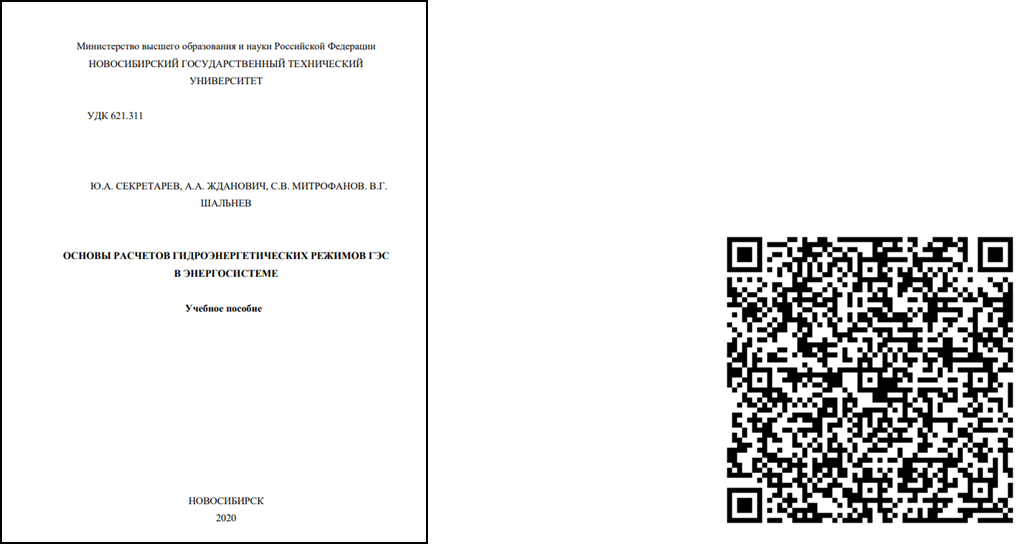

**Учебно-методический курс:**

https://dispace.edu.nstu.ru/didesk/course/show/10047

# ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОЙ ГЛУБИНЫ СРАБОТКИ ВОДОХРАНИЛИЩА И ЕГО ПОЛЕЗНОГО ОБЪЕМА

##Основные положения методики расчета оптимальной глубины сработки водохранилища годового регулирования

Выработку ГЭС при наличии водохранилища можно представить состоящей из двух частей: выработки электроэнергии за счет бытового стока реки Эбыт, протекающего во время сработки водохранилища, и выработки за счет сработки водохранилища Эвдхр

Таким образом, можно построить следующие логические цепочки:

⦁	со стороны бытового стока:


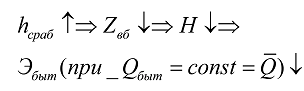

⦁	со стороны стока из водохранилища:

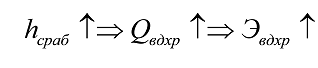

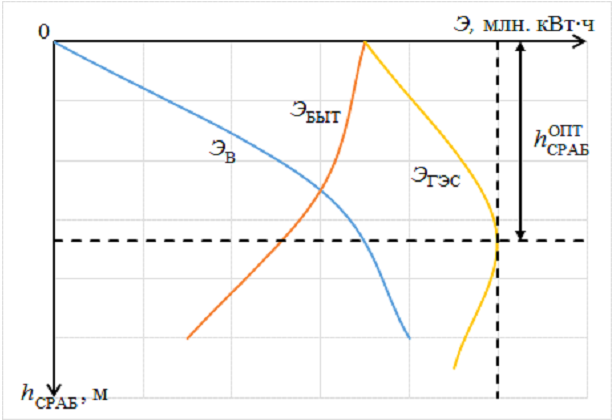

График зависимости энергии от глубины сработки водохранилища


Суммируя для различных глубин сработки энергию водохранилища и транзитную энергию, мы получим полную величину энергии ГЭС за весь период сработки водохранилища. Очевидно, что для данных гидрологических условий и для принятого режима регулирования та глубина сработки водохранилища, при которой ГЭС вырабатывает наибольшее количество энергии, оказывается наиболее выгодной.
Дальнейшее углубление сработки водохранилища, хотя и увеличило бы его полезный объем и регулируемый расход, используемый ГЭС, но при этом напор уменьшился бы настолько, что полное количество энергии, вырабатываемой ГЭС, не увеличилось бы, а уменьшилось.


## Пример расчета оптимальной глубины сработки водохранилища

1. В течение всего периода сработки водохранилища величина бытового расхода рассчитывается как среднее значение расхода воды за весь период сработки:


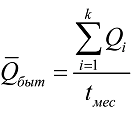

где   – средний расход на месячном интервале (м3/с), взятый из гидрографа;     – период сработки, месяцев, количество месяцев сработки;


2. Период сработки водохранилища рассчитывается в соответствии с рис.4.1 и в расчетах используется его значение, полученное в секундах.
3. Так как период сработки водохранилища достаточно велик, то для расчета среднего за период напора Hгэс используем среднюю отметку верхнего бьефа, вычисленную как

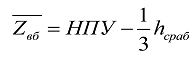

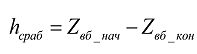

где  ,   – начальная и конечная отметки верхнего бьефа
(рис. 4.4).

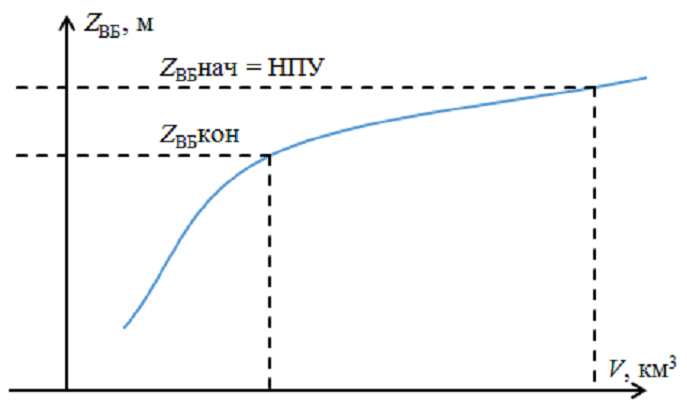

Рис.1 Зависимость верхнего бьефа от его объема

В качестве критерия, используемого для получения оптимальной величины сработки водохранилища, выбирается критерий максимизации выработки электроэнергии за весь период сработки.


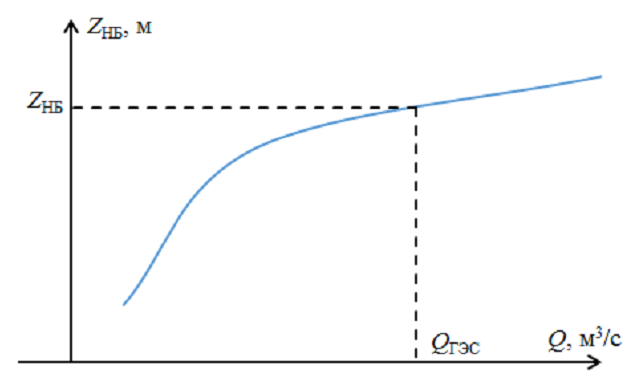

Рис.2 Зависимость уровня нижнего бьефа от расхода через ГЭС

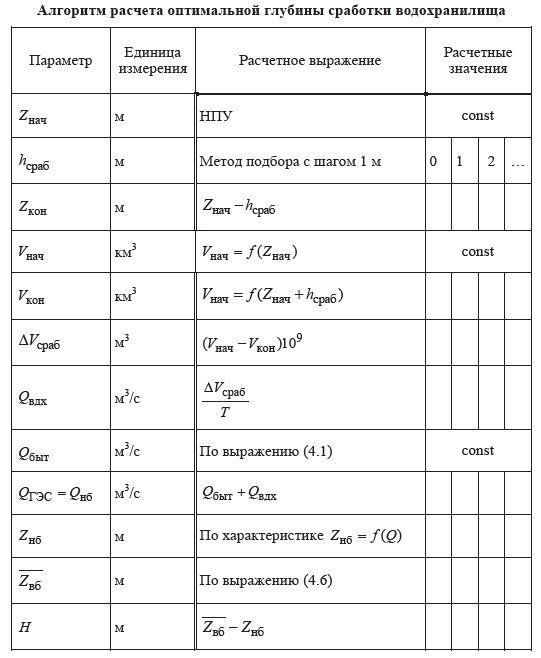

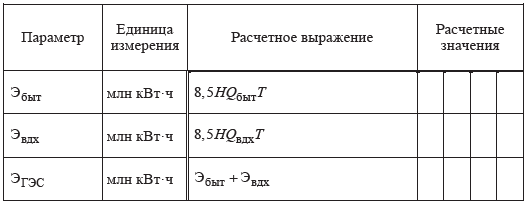

##**Решение**

Данная работа выполнена Пархаевым В.У. и Максимовым Д.А., вариант №5

Тело программы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class ReservoirAnalysis:
    def __init__(self, headwater_mark, average_volume, lowwater_mark, lowwater_inflow, inflow_i, normal_retaining_level, response_time):
        self.headwater_mark = headwater_mark
        self.average_volume = average_volume
        self.lowwater_mark = lowwater_mark
        self.lowwater_inflow = lowwater_inflow
        self.inflow_i = inflow_i
        self.normal_retaining_level = normal_retaining_level
        self.response_time = response_time

    def dependence_of_headwater_mark_on_average_volume(self):
        coeffs = np.polyfit(self.headwater_mark, self.average_volume, 3)
        poly = np.poly1d(coeffs)
        mark_range = np.linspace(min(self.headwater_mark), max(self.headwater_mark), 100)

        plt.plot(poly(mark_range), mark_range, label='Z_вб (полином)')
        plt.scatter(self.average_volume, self.headwater_mark, color='red', marker='o', label='Z_вб (данные)')
        plt.title('Зависимость уровня верхнего бьефа от объема')
        plt.xlabel('Объем (V), м^3')
        plt.ylabel('Уровень верхнего бьефа (Z_вб), м')
        plt.grid(True)
        plt.legend()
        plt.show()

    def dependence_of_lowwater_mark_on_lowwater_inflow(self):
        coeffs = np.polyfit(self.lowwater_inflow, self.lowwater_mark, 3)
        poly = np.poly1d(coeffs)
        inflow_range = np.linspace(min(self.lowwater_inflow), max(self.lowwater_inflow), 100)

        plt.plot(inflow_range, poly(inflow_range), label='Z_нб (полином)')
        plt.scatter(self.lowwater_inflow, self.lowwater_mark, color='red', marker='o', label='Z_нб (данные)')
        plt.title('Зависимость уровня нижнего бьефа от расхода')
        plt.xlabel('Расход (Q_нб), м^3/с')
        plt.ylabel('Уровень нижнего бьефа (Z_нб), м')
        plt.grid(True)
        plt.legend()
        plt.show()

    def calculate(self):
        reservoir_drawdown_depth = np.arange(0, 21, 1)

        df_results = []
        for i in range(len(reservoir_drawdown_depth)):
            reservoir_drawdown_depth_i = reservoir_drawdown_depth[i]
            initial_reservoir_volume = np.interp(self.normal_retaining_level, self.headwater_mark, self.average_volume)

            final_headwater_mark = self.normal_retaining_level - reservoir_drawdown_depth_i
            final_reservoir_volume = np.interp(final_headwater_mark, self.headwater_mark, self.average_volume)

            trigger_volume = (initial_reservoir_volume - final_reservoir_volume) * 10 ** 9
            reservoir_flow = trigger_volume / (self.response_time * 60 ** 2)

            average_domestic_inflow = np.mean(self.inflow_i)
            hydropowerplant_inflow = average_domestic_inflow + reservoir_flow

            lowwater_mark_i = np.interp(hydropowerplant_inflow, self.lowwater_inflow, self.lowwater_mark)
            mean_headwater_mark = self.normal_retaining_level - reservoir_drawdown_depth_i / 3
            downstream_pressure = mean_headwater_mark - lowwater_mark_i

            domestic_energy = 8.5 * downstream_pressure * average_domestic_inflow * self.response_time / 10 ** 6
            reservoir_energy = 8.5 * downstream_pressure * reservoir_flow * self.response_time / 10 ** 6
            hydropowerplant_energy = domestic_energy + reservoir_energy

            df_result = pd.DataFrame([[self.normal_retaining_level, reservoir_drawdown_depth_i, final_headwater_mark,
                                    initial_reservoir_volume, final_reservoir_volume, trigger_volume,
                                    reservoir_flow, average_domestic_inflow, hydropowerplant_inflow,
                                    lowwater_mark_i, mean_headwater_mark, downstream_pressure,
                                    domestic_energy, reservoir_energy, hydropowerplant_energy]],
                                    columns=['Z_нач, м', 'h_сраб, м', 'Z_кон, м', 'V_нач, км3', 'V_кон, км3', 'dV_сраб, м3',
                                            'Q_вдх, м3/с', 'Q_быт, м3/с', 'Q_ГЭС, м3/с', 'Z_нб, м', 'Z_нб_mean, м', 'H, м',
                                            'Э_быт, млн кВт*ч', 'Э_вдх, млн кВт*ч', 'Э_ГЭС, млн кВт*ч'])

            df_results.append(df_result)

        df_all_results = pd.concat(df_results, ignore_index=True)
        return df_all_results

    def plot_energy_dependence(self):
        reservoir_drawdown_depth = np.arange(0, 21, 1)
        df_results = self.calculate()

        plt.plot(df_results['Э_быт, млн кВт*ч'], reservoir_drawdown_depth, label='Domestic Energy')
        plt.plot(df_results['Э_вдх, млн кВт*ч'], reservoir_drawdown_depth, label='Reservoir Energy')
        plt.plot(df_results['Э_ГЭС, млн кВт*ч'], reservoir_drawdown_depth, label='Hydropowerplant Energy')

        plt.title('Energy Dependence on Reservoir Drawdown Depth')
        plt.xlabel('Energy, million kWh')
        plt.ylabel('Reservoir Drawdown Depth, m')
        plt.grid(True)
        plt.legend()
        plt.show()

    def optima_values(self):
        df_results = self.calculate()
        max_hydropowerplant_energy = df_results['Э_ГЭС, млн кВт*ч'].max()

        max_energy_index = df_results['Э_ГЭС, млн кВт*ч'].idxmax()
        corresponding_depth = df_results.loc[max_energy_index, 'h_сраб, м']
        dead_volume_level = self.normal_retaining_level - corresponding_depth

        optima_volume = np.interp(dead_volume_level, self.headwater_mark, self.average_volume)
        nrl_volume = np.interp(self.normal_retaining_level, self.headwater_mark, self.average_volume)
        usable_volume = nrl_volume - optima_volume

        initial_reservoir_volume = np.interp(self.normal_retaining_level, self.headwater_mark, self.average_volume)
        percent_volume = usable_volume / initial_reservoir_volume * 100

        df_optima = pd.DataFrame([[max_hydropowerplant_energy, corresponding_depth, dead_volume_level, usable_volume, percent_volume]],
                                columns=['Э_ГЭС_max, млн кВт*ч', 'h_сраб_опт, м', 'УМО, м', 'V_пол, км3', 'V_пол, %'])

        return df_optima

# На всякий случай пусть будет здесь =)
# def main():
#     headwater_mark = [87, 89, 91, 93, 95, 97, 99, 101, 103]
#     average_volume = [0.1, 0.4, 0.9, 2.3, 4.6, 8.8, 14.6, 21, 29.3]
#     lowwater_mark = [81, 83, 85, 87, 89, 91]
#     lowwater_inflow = [100, 460, 1200, 2250, 3800, 5100]
#     inflow_i = [875, 737.5, 1325, 1325, 1000]
#     normal_retaining_level = 102
#     response_time = 4320

#     analysis = ReservoirAnalysis(headwater_mark, average_volume, lowwater_mark, lowwater_inflow, inflow_i, normal_retaining_level, response_time)

#     analysis.dependence_of_headwater_mark_on_average_volume()
#     analysis.dependence_of_lowwater_mark_on_lowwater_inflow()
#     analysis.plot_energy_dependence()

#     values = analysis.calculate()
#     print(values)
#     optima_values = analysis.optima_values()
#     print(optima_values)

# if __name__ == "__main__":
#     main()

Исходные данные

In [ ]:
headwater_mark = [87, 89, 91, 93, 95, 97, 99, 101, 103]
average_volume = [0.1, 0.4, 0.9, 2.3, 4.6, 8.8, 14.6, 21, 29.3]
lowwater_mark = [81, 83, 85, 87, 89, 91]
lowwater_inflow = [100, 460, 1200, 2250, 3800, 5100]
inflow_i = [875, 737.5, 1325, 1325, 1000]
normal_retaining_level = 102
response_time = 4320
analysis = ReservoirAnalysis(headwater_mark, average_volume, lowwater_mark, lowwater_inflow, inflow_i, normal_retaining_level, response_time)

Построение полиномов кривых верхнего и нижнего бьефа

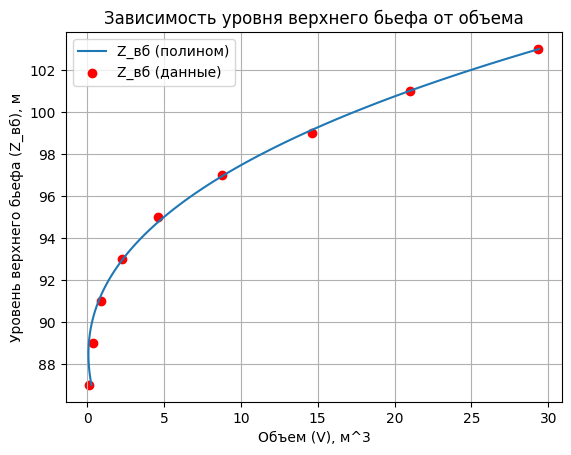

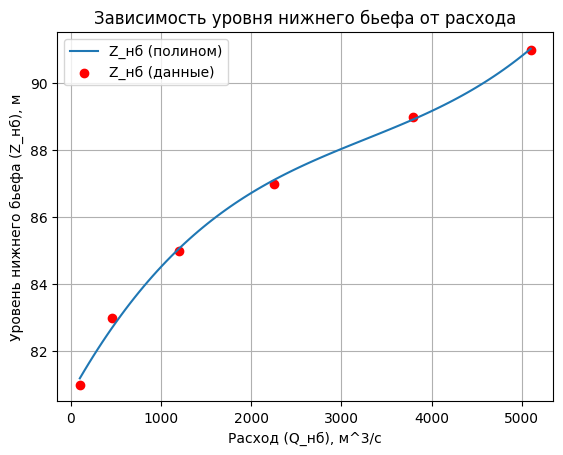

In [ ]:
analysis.dependence_of_headwater_mark_on_average_volume()
analysis.dependence_of_lowwater_mark_on_lowwater_inflow()

Расчёт изменений объема водохранилища, бытового расхода и расхода через водохранилище, отметок бьефов и напора, энергий

In [ ]:
values = analysis.calculate()
values.head()


,"Z_нач, м","h_сраб, м","Z_кон, м","V_нач, км3","V_кон, км3","dV_сраб, м3","Q_вдх, м3/с","Q_быт, м3/с","Q_ГЭС, м3/с","Z_нб, м","Z_нб_mean, м","H, м","Э_быт, млн кВт*ч","Э_вдх, млн кВт*ч","Э_ГЭС, млн кВт*ч"
0,102,0,102,25.15,25.15,0.000000e+00,0.000000,1052.5,1052.500000,84.601351,102.000000,17.398649,672.419493,0.000000,672.419493
1,102,1,101,25.15,21.00,4.150000e+09,266.846708,1052.5,1319.346708,85.227327,101.666667,16.439340,635.344309,161.082696,796.427005
2,102,2,100,25.15,17.80,7.350000e+09,472.608025,1052.5,1525.108025,85.619253,101.333333,15.714080,607.314619,272.704763,880.019382
3,102,3,99,25.15,14.60,1.055000e+10,678.369342,1052.5,1730.869342,86.011180,101.000000,14.988820,579.284929,373.367350,952.652279
4,102,4,98,25.15,11.70,1.345000e+10,864.840535,1052.5,1917.340535,86.366363,100.666667,14.300304,552.675279,454.133952,1006.809230


Построенение графиков

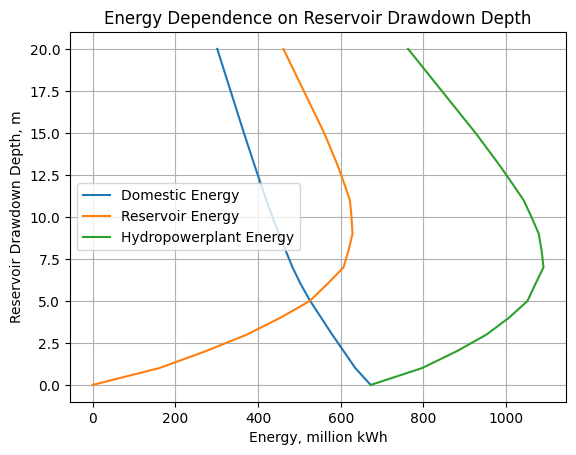

In [ ]:
analysis.plot_energy_dependence()

Расчет максимальной энергии ГЭС, оптимальной глубины сработки водохранилища, УМО, полезного объема водохранилища, доли полезного объема от максимально возможного объема водохранилища

In [ ]:
optima_values = analysis.optima_values()
optima_values

,"Э_ГЭС_max, млн кВт*ч","h_сраб_опт, м","УМО, м","V_пол, км3","V_пол, %"
0,1090.203274,7,95,20.55,81.709742


Вывод

Для работы гидроэлектростанции (ГЭС) с водохранилищем критичны два этапа: первый связан с использованием потока реки Э_быт при срабатывании водохранилища, а второй - с использованием энергии, сохраненной в водохранилище (Э_вдх).

Выработка энергии ГЭС зависит не только от объема потребления воды и времени эксплуатации водохранилища, но также от уровня напора, который отражает глубину сработки водохранилища. Увеличение глубины сработки приводит к повышению производительности и количества создаваемой энергии за счет увеличения объема воды в резервуаре.

В заданных гидрологических условиях и установленном режиме регулирования оптимальная глубина сработки водохранилища (7 м) обеспечивает максимальную производительность ГЭС, генерируя наивысшее количество энергии (1090,2 млн кВт*ч). Это значение следует считать оптимальным для ежегодного использования.

Эффективное использование водохранилища составляет 81,7%, что подразумевает, что летом уровень воды в нем будет минимальным, обеспечивая стабильную работу ГЭС.